# 데이터 준비와 전처리
Movielens 데이터는 `rating.dat` 안에 이미 인덱싱까지 완료된 사용자-영화-평점 데이터가 깔끔하게 정리되어 있습니다.

## RATINGS

* 3점 이상 영화만 남기기
* `timestamp` 변수 제거 
* `rating` 컬럼 이름 `count`로 변경

In [232]:
import os
import pandas as pd

rating_file_path='/content/drive/MyDrive/aiffel/recommendata_iu/data/ml-1m/ratings.dat'
ratings_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv(rating_file_path, sep='::', names=ratings_cols, engine='python', encoding = "ISO-8859-1")
orginal_data_size = len(ratings)
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [233]:
# 3점 이상 영화만 남기기
ratings = ratings[ratings['rating']>=3]
filtered_data_size = len(ratings)

print(f'orginal_data_size: {orginal_data_size}, filtered_data_size: {filtered_data_size}')
print(f'Ratio of Remaining Data is {filtered_data_size / orginal_data_size:.2%}')

orginal_data_size: 1000209, filtered_data_size: 836478
Ratio of Remaining Data is 83.63%


In [234]:
# timestamp 변수 제거
ratings = ratings.drop(['timestamp'], axis=1)
ratings.head(1)

,user_id,movie_id,rating
0,1,1193,5


In [235]:
#rating 컬럼 이름 count로 변경
ratings.rename(columns={'rating':'count'}, inplace=True)
ratings.head(1)

,user_id,movie_id,count
0,1,1193,5


## MOVIES
* `title` 컬럼 소문자로 변경
* `genre` 컬럼 소문자로 변경한 뒤, 특수문자 띄어쓰기로 대체

In [236]:
movie_file_path='/content/drive/MyDrive/aiffel/recommendata_iu/data/ml-1m/movies.dat'
cols = ['movie_id', 'title', 'genre'] 
movies = pd.read_csv(movie_file_path, sep='::', names=cols, engine='python', encoding='ISO-8859-1')
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [237]:
# title 컬럼 소문자로 변경
movies['title'] = movies['title'].str.lower() 
movies.head(10)

,movie_id,title,genre
0,1,toy story (1995),Animation|Children's|Comedy
1,2,jumanji (1995),Adventure|Children's|Fantasy
2,3,grumpier old men (1995),Comedy|Romance
3,4,waiting to exhale (1995),Comedy|Drama
4,5,father of the bride part ii (1995),Comedy
5,6,heat (1995),Action|Crime|Thriller
6,7,sabrina (1995),Comedy|Romance
7,8,tom and huck (1995),Adventure|Children's
8,9,sudden death (1995),Action
9,10,goldeneye (1995),Action|Adventure|Thriller


In [238]:
# `genre` 컬럼 소문자로 변경한 뒤, 특수문자 띄어쓰기로 대체
movies['genre'] = movies['genre'].str.lower() 
movies_df = pd.DataFrame(movies)
movies_df["genre"] = movies_df["genre"].str.replace(pat=r'|', repl=r' ', regex=True)

movies['genre'] = movies_df['genre']
movies.head(1)

,movie_id,title,genre
0,1,toy story (1995),animation children's comedy


## MOVIE_RATING

In [239]:
movie_rating = pd.merge(ratings, movies, how='left', on='movie_id')
movie_rating.head()

,user_id,movie_id,count,title,genre
0,1,1193,5,one flew over the cuckoo's nest (1975),drama
1,1,661,3,james and the giant peach (1996),animation children's musical
2,1,914,3,my fair lady (1964),musical romance
3,1,3408,4,erin brockovich (2000),drama
4,1,2355,5,"bug's life, a (1998)",animation children's comedy


# 데이터 분석
* ratings에 있는 유니크한 영화 개수
* rating에 있는 유니크한 사용자 수
* 가장 인기 있는 영화 30개(인기순)

In [240]:
# ratings에 있는 유니크한 영화 개수
print('unique movies in ratings :', ratings['movie_id'].nunique())
print('unique movies in movie_rating :',movie_rating['movie_id'].nunique())

unique movies in ratings : 3628
unique movies in movie_rating : 3628


In [241]:
# rating에 있는 유니크한 사용자 수
print('unique movies in ratings :', ratings['user_id'].nunique())
print('unique movies in movie_rating :',movie_rating['user_id'].nunique())

unique movies in ratings : 6039
unique movies in movie_rating : 6039


In [242]:
# 가장 인기 있는 영화 30개(인기순)
movie_count = movie_rating.groupby('title')['user_id'].count()
movie_count.sort_values(ascending=False).head(30)

title
american beauty (1999)                                   3211
star wars: episode iv - a new hope (1977)                2910
star wars: episode v - the empire strikes back (1980)    2885
star wars: episode vi - return of the jedi (1983)        2716
saving private ryan (1998)                               2561
terminator 2: judgment day (1991)                        2509
silence of the lambs, the (1991)                         2498
raiders of the lost ark (1981)                           2473
back to the future (1985)                                2460
matrix, the (1999)                                       2434
jurassic park (1993)                                     2413
sixth sense, the (1999)                                  2385
fargo (1996)                                             2371
braveheart (1995)                                        2314
men in black (1997)                                      2297
schindler's list (1993)                                  2257
pr

## 내가 선호하는 영화를 5가지 골라서 rating에 추가

In [243]:
# 선호하는 영화 정보 찾기 
movie_rating[movie_rating['title'].str.contains('gone with the wind')].head(1)

,user_id,movie_id,count,title,genre
147,2,920,5,gone with the wind (1939),drama romance war


내가 찾은 선호하는 영화들의 정보 <br>
> 920 / gone with the wind(1939) / drama romance war	<br>
919 / wizard of oz, the (1939)/ adventure children's drama musical <br>
910 / some like it hot (1959) / comedy crime	 <br>
1035 / sound of music, the (1965) /musical <br>
590 / dances with wolves (1990) / adventure drama western

In [244]:
my_favorite_movie_title = ['gone with the wind (1939)',
                     'wizard of oz, the (1939)',
                     'some like it hot (1959)',
                     'sound of music, the (1965)',
                     'dances with wolves (1990)']

my_favorite_movie_id = [920, 919, 910, 1035, 590]

my_favorite_movie_genre = ['drama romance war',
                           'adventure children\'s drama musical',
                           'comedy crime',
                           'musical',
                           'adventure drama western']

my_movie_rating = pd.DataFrame({'user_id':['seoyun']*5, 'movie_id':my_favorite_movie_id,
                                'count':[5]*5,
                                'title':my_favorite_movie_title,
                                'genre':my_favorite_movie_genre})

if not movie_rating.isin({'user_id':['seoyun']})['user_id'].any():  # user_id에 'zimin'이라는 데이터가 없다면
    movie_rating = movie_rating.append(my_movie_rating)  

movie_rating[movie_rating['user_id'] == 'seoyun']

,user_id,movie_id,count,title,genre
0,seoyun,920,5,gone with the wind (1939),drama romance war
1,seoyun,919,5,"wizard of oz, the (1939)",adventure children's drama musical
2,seoyun,910,5,some like it hot (1959),comedy crime
3,seoyun,1035,5,"sound of music, the (1965)",musical
4,seoyun,590,5,dances with wolves (1990),adventure drama western


## 데이터 분석을 위한 전처리 

In [245]:
# 고유한 유저, 영화를 찾아내는 코드
user_unique = movie_rating['user_id'].unique()
title_unique = movie_rating['title'].unique()

user_to_idx = {v:k for k,v in enumerate(user_unique)}
title_to_idx = {v:k for k,v in enumerate(title_unique)}

In [246]:
# 인덱싱이 잘 되었는지 확인해 봅니다. 
print(user_to_idx['seoyun'])    # 358869명의 유저 중 마지막으로 추가된 유저이니 358868이 나와야 합니다. 
print(title_to_idx['gone with the wind (1939)'])

6039
143


In [247]:
temp_user_data = movie_rating['user_id'].map(user_to_idx.get).dropna()
if len(temp_user_data) == len(movie_rating):
    print("user_id column indexing OK!!")
    movie_rating['user_id'] = temp_user_data 
else:
    print("user_id column indexing Fail!!")

temp_title_data = movie_rating['title'].map(title_to_idx.get).dropna()
if len(temp_title_data) == len(movie_rating):
    print("title column indexing OK!!")
    movie_rating['title'] = temp_title_data
else:
    print("title column indexing Fail!!")

movie_rating

user_id column indexing OK!!
title column indexing OK!!


,user_id,movie_id,count,title,genre
0,0,1193,5,0,drama
1,0,661,3,1,animation children's musical
2,0,914,3,2,musical romance
3,0,3408,4,3,drama
4,0,2355,5,4,animation children's comedy
...,...,...,...,...,...
0,6039,920,5,143,drama romance war
1,6039,919,5,9,adventure children's drama musical
2,6039,910,5,1054,comedy crime
3,6039,1035,5,14,musical


Text(0.5, 1.0, 'Count of Movies')

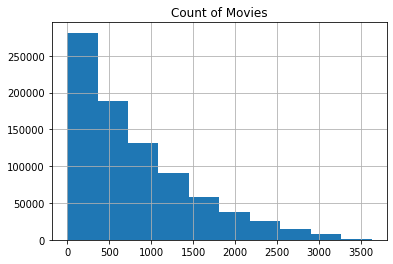

In [319]:
movie_rating['title'].hist()
plt.title('Count of Movies')

> 대부분의 영화는 500점 이하이고 점수가 아주 높은 영화는 아주 적음 

# CSR matix

(m,n) 사이즈의 행렬 R을 (m,k) 사이즈의 행렬 P와 (k,n) 사이즈의 행렬 Q로 분해한다면 R이란 그저 P와 Q의 행렬곱으로 표현 가능할 수 있다는 간단한 아이디어이다. 대체로 k는 m이나 n보다 훨씬 작은 값이기 때문에 계산량 측면으로도 훨씬 유리해지긴 하지만, 아이디어의 단순함에도 불구하고 MF 모델은 성능이 준수하고 Scalability가 좋아서 많이 사용되는 모델이다. 

In [254]:
from scipy.sparse import csr_matrix

num_user = movie_rating['user_id'].nunique()
num_title = movie_rating['title'].nunique()

csr_data = csr_matrix((movie_rating['count'], (movie_rating['user_id'], movie_rating['title'])), shape= (num_user, num_title))
csr_data

<6040x3628 sparse matrix of type '<class 'numpy.longlong'>'
	with 836483 stored elements in Compressed Sparse Row format>

# MF 모델 학습하기 

* `implicit` 패키지는 이전 스텝에서 설명한 암묵적(implicit) dataset을 사용하는 다양한 모델을 굉장히 빠르게 학습할 수 있는 패키지
* 이 패키지에 구현된 `als(AlternatingLeastSquares)` 모델을 사용한다. `Matrix Factorization`에서 쪼개진 두 Feature Matrix를 한꺼번에 훈련하는 것은 잘 수렴하지 않기 때문에, 한쪽을 고정시키고 다른 쪽을 학습하는 방식을 번갈아 수행하는 AlternatingLeastSquares 방식이 효과적인 것으로 알려져 있다.

In [255]:
!pip install implicit

     |████████████████████████████████| 1.1 MB 5.2 MB/s 
  Created wheel for implicit: filename=implicit-0.4.4-cp37-cp37m-linux_x86_64.whl size=3409596 sha256=012fc943a7e2a73ac672bacbf67cf10c8502cee939a334ff0e11bd090f0c679c
  Stored in directory: /root/.cache/pip/wheels/44/7e/7d/a17324ea207cfbe76aca878b5b8ca0aa932cf55d163329be37
Successfully built implicit


In [256]:
from implicit.als import AlternatingLeastSquares
import os
import numpy as np

# implicit 라이브러리에서 권장하고 있는 부분입니다. 학습 내용과는 무관합니다.
os.environ['OPENBLAS_NUM_THREADS']='1'
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ['MKL_NUM_THREADS']='1'

In [396]:
# Implicit AlternatingLeastSquares 모델의 선언
als_model = AlternatingLeastSquares(factors=200, regularization=0.01, use_gpu=False, iterations=30, dtype=np.float32)

In [397]:
# als 모델은 input으로 (item X user 꼴의 matrix를 받기 때문에 Transpose)
csr_data_transpose = csr_data.T
csr_data_transpose

<3628x6040 sparse matrix of type '<class 'numpy.longlong'>'
	with 836483 stored elements in Compressed Sparse Column format>

In [398]:
# 모델 훈련
als_model.fit(csr_data_transpose)

  0%|          | 0/30 [00:00<?, ?it/s]

In [399]:
seoyun, gone_with_the_wind = user_to_idx['seoyun'], title_to_idx['gone with the wind (1939)']
seoyun_vector, gone_with_the_wind_vector = als_model.user_factors[seoyun], als_model.item_factors[gone_with_the_wind]

## `user_vector`과 `movie_vector` 내적 

In [400]:
np.dot(seoyun_vector, gone_with_the_wind_vector)

0.771667

> `factors`와 `iterations`를 높여서 0.50 $\rightarrow$ 0.77로 높임
>
> 두 수치를 늘려 1에 가깝게 나왔다고 해도 이 모델이 잘 학습되었다고 할 수 없다. 

## 다른 영화에 대한 내 선호도 

In [401]:
my_fair_lady = title_to_idx['my fair lady (1964)']
my_fair_lady_vector = als_model.item_factors[my_fair_lady]
np.dot(seoyun_vector, my_fair_lady_vector)

0.14627159

In [402]:
my_fair_lady = title_to_idx['rob roy (1995)']
my_fair_lady_vector = als_model.item_factors[my_fair_lady]
np.dot(seoyun_vector, my_fair_lady_vector)

-0.035862513

# 비슷한 영화 찾기

`AlternatingLeastSquares` 클래스에 구현되어 있는 `similar_items` 메서드를 통하여 비슷한 영화 찾기

선호하는 영화에 포함 된 `sound of music, the (1965)`로 찾아보기

In [297]:
idx_to_title = {v:k for k,v in title_to_idx.items()}
def get_similar_movie(movie_name: str):
    movie_id = title_to_idx[movie_name]
    similar_movie = als_model.similar_items(movie_id)
    similar_movie = [idx_to_title[i[0]] for i in similar_movie]
    return similar_movie

In [321]:
get_similar_movie('sound of music, the (1965)')

['sound of music, the (1965)',
 'oliver! (1968)',
 'my fair lady (1964)',
 'king and i, the (1956)',
 'west side story (1961)',
 'mary poppins (1964)',
 'gigi (1958)',
 'white christmas (1954)',
 'james and the giant peach (1996)',
 'rudy (1993)']

## 비슷한 영화들의 `genre` 알아보기 

In [322]:
similar_movie_list = ['sound of music, the (1965)',
                      'oliver! (1968)',
                      'my fair lady (1964)',
                      'king and i, the (1956)',
                      'west side story (1961)',
                      'mary poppins (1964)',
                      'gigi (1958)',
                      'white christmas (1954)',
                      'james and the giant peach (1996)',
                      'rudy (1993)']

movies.loc[movies['title'].isin(similar_movie_list)]

,movie_id,title,genre
520,524,rudy (1993),drama
655,661,james and the giant peach (1996),animation children's musical
902,914,my fair lady (1964),musical romance
926,938,gigi (1958),musical
1015,1028,mary poppins (1964),children's comedy musical
1022,1035,"sound of music, the (1965)",musical
1878,1947,west side story (1961),musical romance
1882,1951,oliver! (1968),musical
2496,2565,"king and i, the (1956)",musical
3606,3675,white christmas (1954),musical


> 입력한 영화 `sound of music, the (1965)	` 의 장르는 `musical`이다.
>
> 비슷한 영화로 뽑힌 영화들은 `rudy (1993)`을 제외하고 모두 `musical`인 것을 알 수 있다. `rudy (1993)`도 난독증을 가진 학생이 열심히 노력해 원하는 대학에 입학하는 인생에 용기를 주는 뮤지컬스러운(?) 영화이다. 

## `genre`가 `horror`인 영화로 확인해보기

In [308]:
movies[movies['genre'].str.contains('horror')].head()

,movie_id,title,genre
11,12,dracula: dead and loving it (1995),comedy horror
69,70,from dusk till dawn (1996),action comedy crime horror thriller
150,152,"addiction, the (1995)",horror
175,177,lord of illusions (1995),horror
186,188,"prophecy, the (1995)",horror


In [310]:
get_similar_movie('addiction, the (1995)')

['addiction, the (1995)',
 'castle freak (1995)',
 'nightmares (1983)',
 'living dead girl, the (la morte vivante) (1982)',
 'carnosaur 2 (1995)',
 'nadja (1994)',
 'bay of blood (reazione a catena) (1971)',
 'tokyo fist (1995)',
 'love and a .45 (1994)',
 'vampyros lesbos (las vampiras) (1970)']

In [311]:
similar_movie_list = ['addiction, the (1995)',
 'castle freak (1995)',
 'nightmares (1983)',
 'living dead girl, the (la morte vivante) (1982)',
 'carnosaur 2 (1995)',
 'nadja (1994)',
 'bay of blood (reazione a catena) (1971)',
 'tokyo fist (1995)',
 'love and a .45 (1994)',
 'vampyros lesbos (las vampiras) (1970)']

movies.loc[movies['title'].isin(similar_movie_list)]

,movie_id,title,genre
150,152,"addiction, the (1995)",horror
182,184,nadja (1994),drama
218,220,castle freak (1995),horror
596,600,love and a .45 (1994),thriller
1717,1773,tokyo fist (1995),action drama
2786,2855,nightmares (1983),horror
3016,3085,"living dead girl, the (la morte vivante) (1982)",horror
3050,3119,bay of blood (reazione a catena) (1971),horror
3147,3216,vampyros lesbos (las vampiras) (1970),horror
3504,3573,carnosaur 2 (1995),horror sci-fi


> 마찬가지로 비슷한 영화를 잘 찾은 것을 볼 수 있다. 

# 유저에서 아티스트 추천하기 

`AlternatingLeastSquares` 클래스에 구현되어 있는 `recommend` 메서드를 통하여 제가 좋아할 만한 아티스트를 추천받는다. 

`filter_already_liked_items` 는 유저가 이미 평가한 아이템은 제외하는 Argument

In [312]:
user = user_to_idx['seoyun']
# recommend에서는 user*item CSR Matrix를 받습니다.
movie_recommended = als_model.recommend(user, csr_data, N=20, filter_already_liked_items=True)
movie_recommended

[(27, 0.3190795),
 (354, 0.27228022),
 (45, 0.26436567),
 (656, 0.25662625),
 (276, 0.21566059),
 (80, 0.21034351),
 (201, 0.19781098),
 (107, 0.19635764),
 (2, 0.18874481),
 (678, 0.18621464),
 (356, 0.18188033),
 (161, 0.17867152),
 (100, 0.17866592),
 (663, 0.17647994),
 (445, 0.17353037),
 (451, 0.17326692),
 (501, 0.1624714),
 (409, 0.1603834),
 (8, 0.1563244),
 (655, 0.15013783)]

In [315]:
[idx_to_title[i[0]] for i in movie_recommended]

['titanic (1997)',
 'west side story (1961)',
 'mary poppins (1964)',
 'african queen, the (1951)',
 'north by northwest (1959)',
 'stand by me (1986)',
 'who framed roger rabbit? (1988)',
 'jurassic park (1993)',
 'my fair lady (1964)',
 'willy wonka and the chocolate factory (1971)',
 'legends of the fall (1994)',
 'graduate, the (1967)',
 'amadeus (1984)',
 "singin' in the rain (1952)",
 'red violin, the (le violon rouge) (1998)',
 'american history x (1998)',
 'treasure of the sierra madre, the (1948)',
 'rudy (1993)',
 'snow white and the seven dwarfs (1937)',
 'lawrence of arabia (1962)']

## `titanic (1997)`을 추천하는데 각 영화가 기여한 정도 

In [318]:
titanic = title_to_idx['titanic (1997)']
explain = als_model.explain(user, csr_data, itemid=titanic)

[(idx_to_title[i[0]], i[1]) for i in explain[1]]

[('some like it hot (1959)', 0.0775016255175134),
 ('gone with the wind (1939)', 0.06893571189716541),
 ('sound of music, the (1965)', 0.05968447693520727),
 ('wizard of oz, the (1939)', 0.05564360618502319),
 ('dances with wolves (1990)', 0.05423728704031314)]

> 5개의 영화가 비슷한 수준으로 기여했다

In [381]:
titanic = title_to_idx['african queen, the (1951)']
explain = als_model.explain(user, csr_data, itemid=titanic)

[(idx_to_title[i[0]], i[1]) for i in explain[1]]

[('gone with the wind (1939)', 0.11351275969934432),
 ('some like it hot (1959)', 0.07317678014442593),
 ('dances with wolves (1990)', 0.0390370974478561),
 ('wizard of oz, the (1939)', 0.01738222477376351),
 ('sound of music, the (1965)', 0.0111434063529592)]

> `african queen, the (1951)`의 경우 `gone with the wind (1939)`가 가장 많이 기여했다. 

## 추천 영화와 선호하는 영화 장르 비교 

In [375]:
recommand_movie_list = ['titanic (1997)',
 'west side story (1961)',
 'mary poppins (1964)',
 'african queen, the (1951)',
 'north by northwest (1959)',
 'stand by me (1986)',
 'who framed roger rabbit? (1988)',
 'jurassic park (1993)',
 'my fair lady (1964)',
 'willy wonka and the chocolate factory (1971)',
 'legends of the fall (1994)',
 'graduate, the (1967)',
 'amadeus (1984)',
 "singin' in the rain (1952)",
 'red violin, the (le violon rouge) (1998)',
 'american history x (1998)',
 'treasure of the sierra madre, the (1948)',
 'rudy (1993)',
 'snow white and the seven dwarfs (1937)',
 'lawrence of arabia (1962)']

recommand_movie = movies.loc[movies['title'].isin(recommand_movie_list)]
recommand_movie_gerne = ['romance', 'adventure', 'drama', 'musical', 'romance', 'thriller', 'romance','romance','musical', 'adventure', 'adventure', 
                         'drama', 'romance', 'adventure', 'adventure', 'romance', 'romance', 'drama', 'mystery', 'adventure']
recommand_movie['genre'] = recommand_movie_gerne
recommand_movie['type'] = ['recommand']*20

my_movie_rating_genre = ['romance', 'musical', 'comedy', 'musical', 'adventure']
my_movie_rating['genre'] = my_movie_rating_genre
my_movie_rating['type'] = ['my favorite']*5

movie = pd.concat([my_movie_rating, recommand_movie])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


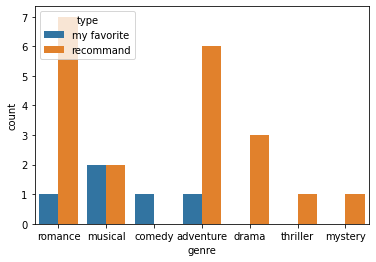

In [377]:
import seaborn as sns

sns.countplot(x='genre', hue='type', data=movie)

> 영화는 장르에 영향을 많이 받을것이라고 생각보다 많은 영향을 받지 않은 것 같다. 7개의 장르 중 4개만 영향을 받은 것으로 보여진다. 

# 회고 

머신러닝을 배울 때 가장 처음으로 예시를 드는 것이 로지스틱과 넷플릭스 영화 추천이다. 추천을 하는지(1) 안 하는지 (0)에 대한 내용을 가장 먼저 접했다. 나름의 추천 시스템을 접해서 좋은 경험을 한 것 같다.

여러 코드를 작성했는데 비루한 코딩 실력으로 너무 길고 활용적이지 못한 코드라 앞으로 알고리즘 공부를 꼭 해야겠다고 생각했다.

모델의 객관적인 지표를 만들고 싶었는데 아직까지 역량이 부족한 것 같다!

https://zephyrus1111.tistory.com/46

https://pydole.tistory.com/entry/%EC%9E%91%EC%84%B1%EC%A4%91

https://dojang.io/mod/page/view.php?id=2299

https://seong6496.tistory.com/121

https://acdongpgm.tistory.com/166